In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

df = "condensedata.csv"

world_bank = pd.read_csv(df, index_col=0)


In [2]:
world_bank = world_bank.T
world_bank.head(10)

Indicator Name,GDP per person employed (constant 2011 PPP $),Trade (% of GDP),Manufactures exports (% of merchandise exports),Taxes on international trade (% of revenue),Tax revenue (% of GDP),Surface area (sq. km),Net lending (+) / net borrowing (-) (% of GDP),Gross domestic savings (% of GDP),GDP per capita growth (annual %),GDP per capita (current US$),GDP growth (annual %),GDP (current US$)
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1414.982269,NaN,248434097.0
1961,NaN,NaN,NaN,NaN,NaN,103000.0,NaN,NaN,-2.012883,1418.125870,-0.084662,253885656.3
1962,NaN,NaN,1.210346,NaN,NaN,103000.0,NaN,NaN,6.324752,1562.230730,8.313713,284916516.2
1963,NaN,NaN,1.710342,NaN,NaN,103000.0,NaN,NaN,8.337936,1831.705656,10.283383,340061650.1
1964,NaN,NaN,1.857268,NaN,NaN,103000.0,NaN,NaN,7.979745,2297.920643,9.916544,434267936.9
1965,NaN,NaN,1.663195,NaN,NaN,103000.0,NaN,NaN,5.527347,2723.520950,7.371729,523694949.4
1966,NaN,NaN,3.230977,NaN,NaN,103000.0,NaN,NaN,6.910046,3215.694178,8.735933,628893310.4
1967,NaN,NaN,3.519278,NaN,NaN,103000.0,NaN,NaN,-2.847474,3125.649492,-1.267262,621225962.2
1968,NaN,NaN,2.505313,NaN,NaN,103000.0,NaN,NaN,-6.758929,2354.480027,-5.474906,474399471.6
1969,NaN,NaN,4.352084,NaN,NaN,103000.0,NaN,NaN,1.427705,2039.196295,2.374588,414709311.4


In [3]:
kenn_df = world_bank[["GDP per capita (current US$)", "GDP growth (annual %)", "GDP (current US$)"]]
kenn_df

Indicator Name,GDP per capita (current US$),GDP growth (annual %),GDP (current US$)
1960,1414.982269,NaN,2.484341e+08
1961,1418.125870,-0.084662,2.538857e+08
1962,1562.230730,8.313713,2.849165e+08
1963,1831.705656,10.283383,3.400617e+08
1964,2297.920643,9.916544,4.342679e+08
1965,2723.520950,7.371729,5.236949e+08
1966,3215.694178,8.735933,6.288933e+08
1967,3125.649492,-1.267262,6.212260e+08
1968,2354.480027,-5.474906,4.743995e+08
1969,2039.196295,2.374588,4.147093e+08


In [4]:
kenn_df = kenn_df.reset_index()

kenn_df

Indicator Name,index,GDP per capita (current US$),GDP growth (annual %),GDP (current US$)
0,1960,1414.982269,NaN,2.484341e+08
1,1961,1418.125870,-0.084662,2.538857e+08
2,1962,1562.230730,8.313713,2.849165e+08
3,1963,1831.705656,10.283383,3.400617e+08
4,1964,2297.920643,9.916544,4.342679e+08
5,1965,2723.520950,7.371729,5.236949e+08
6,1966,3215.694178,8.735933,6.288933e+08
7,1967,3125.649492,-1.267262,6.212260e+08
8,1968,2354.480027,-5.474906,4.743995e+08
9,1969,2039.196295,2.374588,4.147093e+08


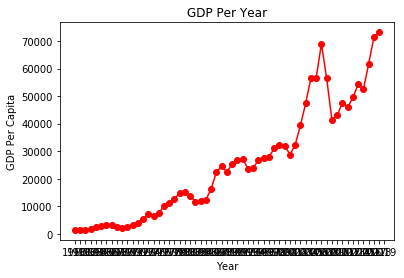

In [6]:
years = kenn_df["index"]
gdp_per_capita = kenn_df["GDP per capita (current US$)"]
per_capita = plt.plot(years, gdp_per_capita, marker = "o", color = "red")

plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.title("GDP Per Year")
plt.show()

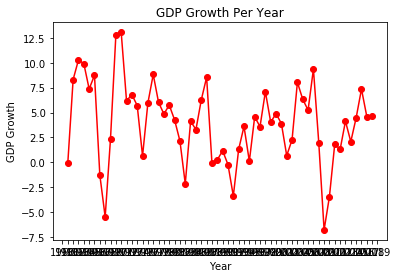

In [8]:
years = kenn_df["index"]
gdp_growth = kenn_df["GDP growth (annual %)"]
per_capita = plt.plot(years, gdp_growth, marker = "o", color = "red")

plt.xlabel("Year")
plt.ylabel("GDP Growth")
plt.title("GDP Growth Per Year")
plt.show()

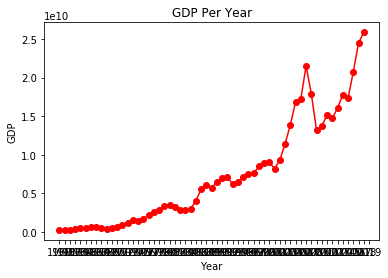

In [9]:
years = kenn_df["index"]
gdp = kenn_df["GDP (current US$)"]
per_capita = plt.plot(years, gdp, marker = "o", color = "red")

plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP Per Year")
plt.show()